In [0]:
import pandas as pd
import numpy as np

#Visual
import altair as alt
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LogNorm
import seaborn as sns
sns.set()

# ML library
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# cluster
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FastICA 
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

In this chapter, we will be working with an open source dataset shared publicly by the
Australian Taxation Office (ATO). The dataset contains statistics about each postcode
(also known as a zip code, which is an identification code used for sorting mail by area) in
Australia during the financial year of 2014-15

# Activity 5.01: Perform Customer Segmentation Analysis in a Bank

You are working for an international bank. The credit department is reviewing its
offerings and wants to get a better understanding of its current customers. You have
been tasked with performing customer segmentation analysis. You will perform cluster
analysis with k-means to identify groups of similar customers

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/german.data-numeric'
df = pd.read_csv(file_url, header=None, sep='\s\s+', prefix='X')
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1,1.0
1,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1,2.0
2,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0,1,0,1,0,1.0
3,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0,0,1,1.0
4,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,0,0,1,2.0


In [0]:
X = df[['X3', 'X9']]
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

## Kmeans

In [0]:
clusters = pd.DataFrame()
inertia = []
clusters['cluster_range'] = range(1, 15)

for k in clusters['cluster_range']:
    kmeans = KMeans(n_clusters=k, random_state=8).fit(X_scaled)
    inertia.append(kmeans.inertia_)

clusters['inertia'] = inertia
clusters

,cluster_range,inertia
0,1,2000.000000
1,2,1280.612749
2,3,767.637196
3,4,576.086134
4,5,443.905649
5,6,360.418261
6,7,291.393050
7,8,252.709449
8,9,219.498996
9,10,193.015983


In [0]:
alt.Chart(clusters).mark_line().encode(alt.X('cluster_range'), alt.Y('inertia'))

alt.Chart(...)

Choose number of cluster by sklearn silhouette:

### Silhouette for choosing number of cluster

For n_clusters = 2 The average silhouette_score is : 0.5362375229214517
For n_clusters = 3 The average silhouette_score is : 0.381016808479933
For n_clusters = 4 The average silhouette_score is : 0.4137522092265234
For n_clusters = 5 The average silhouette_score is : 0.4486243116570937
For n_clusters = 6 The average silhouette_score is : 0.40495707883275284


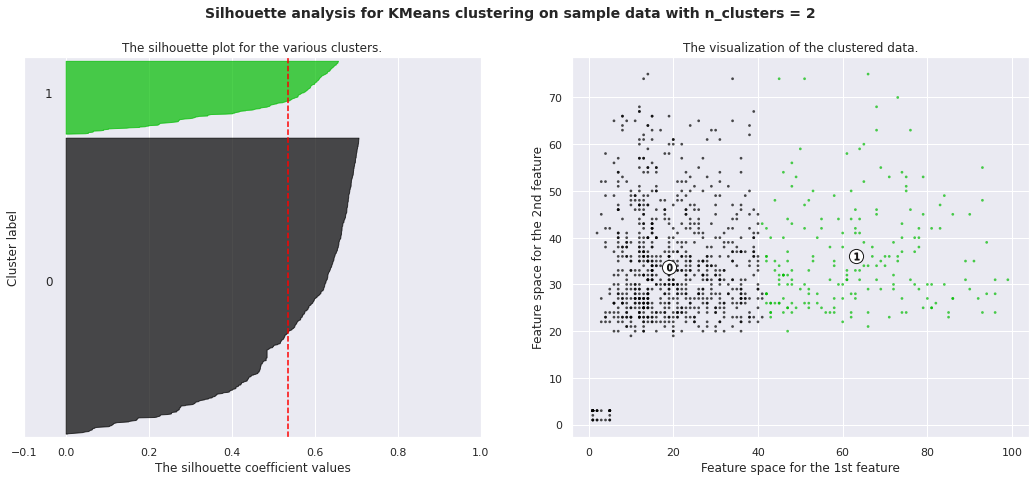

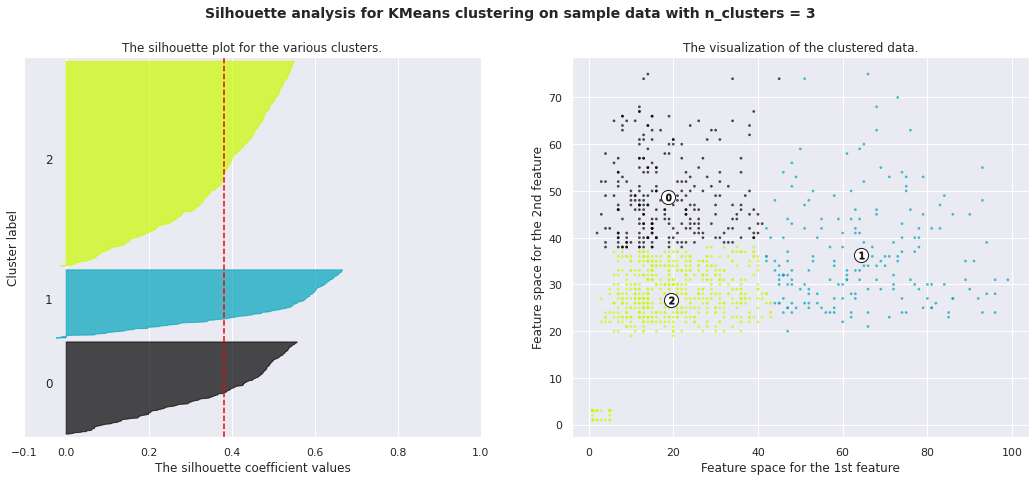

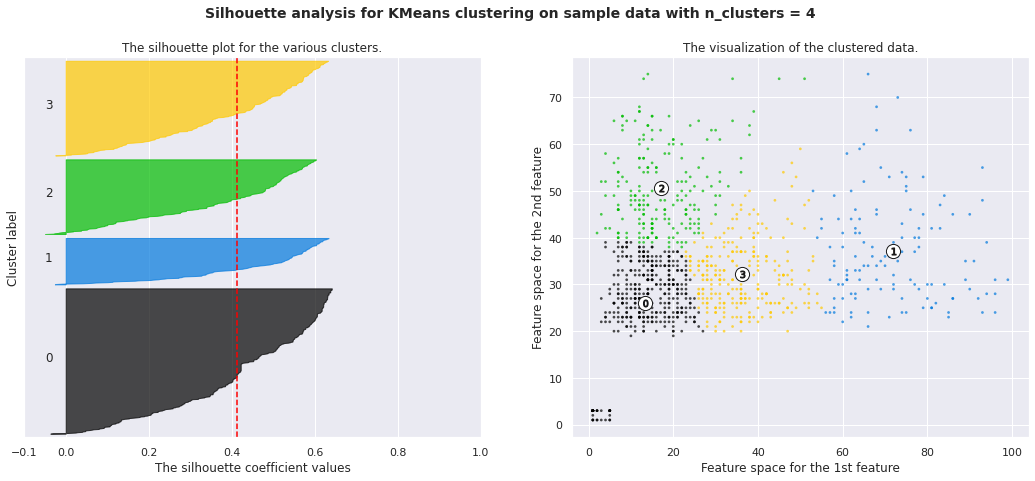

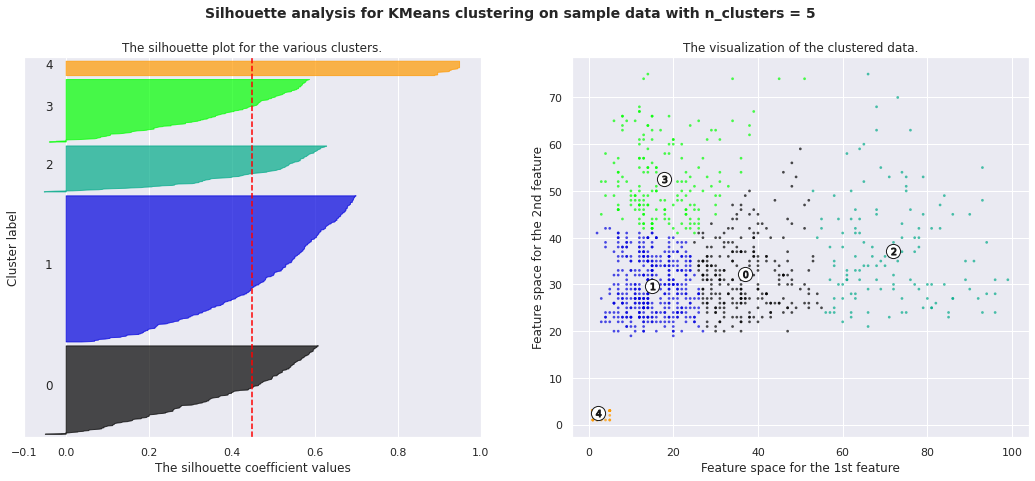

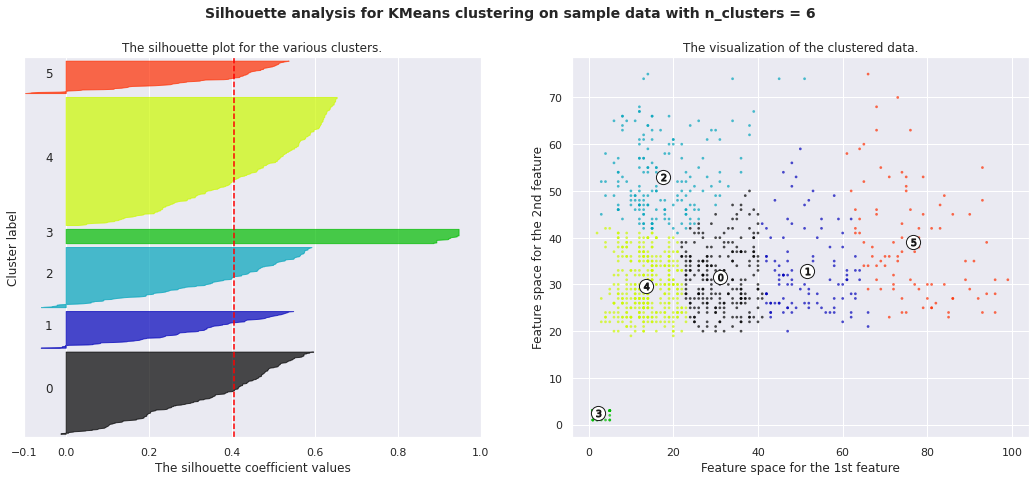

In [0]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['X3'], X['X9'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Plot altair (combine cluster to df)

In [0]:
clusters_number = 5
kmeans = KMeans(random_state=1, n_clusters=clusters_number, init='k-means++',
                n_init=50, max_iter=1000)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.predict(X_scaled)

In [0]:
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['X3', 'X9'])
print(centroids)

         X3        X9
0  2.120025  0.269530
1 -0.609786 -0.345153
2 -0.360708  1.402672
3 -1.212705 -2.452428
4  0.453083 -0.292360


In [0]:
centroids_inverse=standard_scaler.inverse_transform(centroids)
centroids_inverse = pd.DataFrame(centroids_inverse, columns=['X3', 'X9'])
centroids_inverse

,X3,X9
0,72.008000,37.616000
1,14.884804,29.688725
2,20.096939,52.229592
3,2.268293,2.512195
4,37.126087,30.369565


In [0]:
chart1=alt.Chart(df).mark_circle().encode(x='X3', y='X9',color='cluster:N',
                    tooltip=['X3','X9']).interactive()

chart2 = alt.Chart(centroids_inverse).mark_circle(size=100).encode(x='X3',
y='X9', color=alt.value('black'),
tooltip=['X3', 'X9']).interactive()

chart1 + chart2

alt.LayerChart(...)

### Other method plot (best)

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/german.data-numeric'

df = pd.read_csv(file_url, header=None, sep='\s\s+', prefix='X')
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1,1.0
1,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1,2.0
2,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0,1,0,1,0,1.0
3,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0,0,1,1.0
4,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,0,0,1,2.0


In [0]:
X = df[['X3', 'X9']]
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)
X_scaled

array([[-0.74764519,  2.54797287],
       [ 1.54618474, -0.94133873],
       [-0.31755208,  1.15224823],
       ...,
       [-0.93879769,  0.29930539],
       [-0.46091645, -0.86379847],
       [ 0.87715101, -0.55363744]])

In [0]:
clusters_number = 5
kmeans = KMeans(random_state=1, n_clusters=clusters_number, init='k-means++', n_init=50, max_iter=1000)
kmeans.fit(X_scaled)
cluster=kmeans.predict(X_scaled)

unique_labels = set(cluster)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
print(unique_labels)
print(colors)

{0, 1, 2, 3, 4}
[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0), (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0), (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0), (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]


In [0]:
centroids = kmeans.cluster_centers_
centroids_inverse=standard_scaler.inverse_transform(centroids)
centroids_inverse = pd.DataFrame(centroids_inverse, columns=['X3', 'X9'])
centroids_inverse

,X3,X9
0,72.008000,37.616000
1,14.884804,29.688725
2,20.096939,52.229592
3,2.268293,2.512195
4,37.126087,30.369565


In [0]:
k_means_cluster_centers=kmeans.cluster_centers_
k_means_labels = pairwise_distances_argmin(X_scaled, k_means_cluster_centers)
#k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

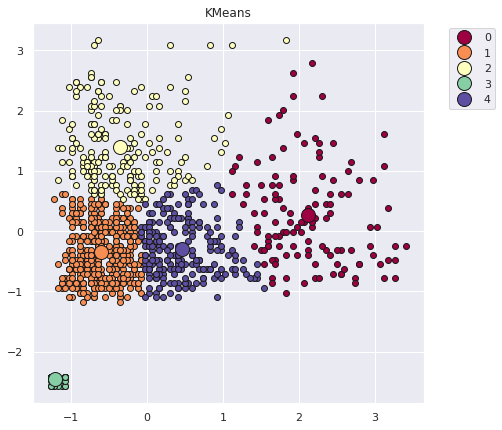

In [0]:
fig,ax=plt.subplots(figsize=(7,7))
for k, col in zip(range(clusters_number), colors):
    my_members = k_means_labels == k #separate each cluster (true, false,true....)
    cluster_center = k_means_cluster_centers[k]
    #plot point
    ax.plot(X_scaled[my_members, 0], X_scaled[my_members, 1], 'o', 
            markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6
            )
    #plot center
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=14,label=k)
    
ax.set_title('KMeans')
#ax.set_xticks(())
#ax.set_yticks(())
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### Decision Boundaries

In [0]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

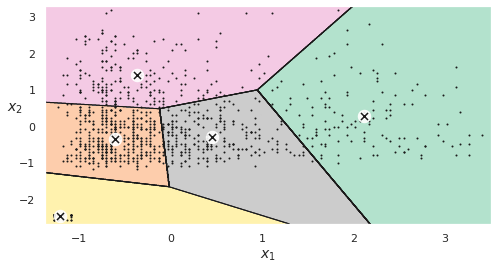

In [0]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_scaled)
#save_fig("voronoi_plot")
plt.show()

## Hierarchical clustering

In [0]:
X_scaled.shape

(1000, 2)

In [0]:
ac = AgglomerativeClustering(n_clusters=5,
                             affinity='euclidean',
                             linkage='complete')
df['cluster_ac'] = ac.fit_predict(X_scaled)

In [0]:
chart1=alt.Chart(df).mark_circle().encode(x='X3', y='X9',color='cluster_ac:N',
                    tooltip=['X3','X9']).interactive()

chart1

alt.Chart(...)

Other plot

In [0]:
clusters_number = 5
ac = AgglomerativeClustering(n_clusters=5,
                             affinity='euclidean',
                             linkage='complete')
#ac.fit(X_scaled)
cluster=ac.fit_predict(X_scaled)

unique_labels = set(cluster)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
print(unique_labels)
print(colors)

{0, 1, 2, 3, 4}
[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0), (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0), (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0), (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]


In [0]:
cluster[:10]

array([1, 2, 1, 0, 0, 0, 1, 0, 3, 2])

In [0]:
X

,X3,X9
0,12,67
1,60,22
2,21,49
3,79,45
4,49,53
...,...,...
995,17,31
996,39,40
997,8,38
998,18,23


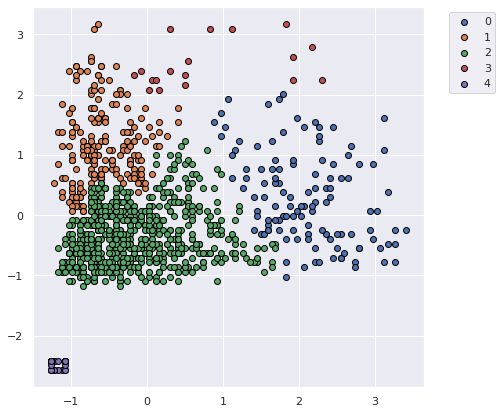

In [0]:
fig,ax=plt.subplots(figsize=(7,7))
for k in range(clusters_number):
  plt.scatter(X_scaled[cluster==k, 0],X_scaled[cluster==k, 1], 
              edgecolor='black',marker='o',label=k)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Plot Hierarchical Clustering Dendrogram

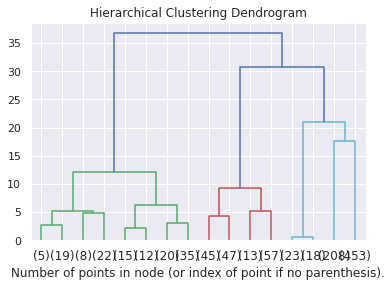

In [0]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_scaled)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## DBSCANE (no define cluster)

In [0]:
n=0.2

In [0]:
# Compute DBSCAN
db = DBSCAN(eps=n, min_samples=10).fit(X_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(core_samples_mask.shape)
print(labels.shape)
df['cluster_dbscame']=labels
df['cluster_dbscame'].value_counts()


(1000,)
(1000,)


 0    702
-1    237
 1     41
 2     13
 3      7
Name: cluster_dbscame, dtype: int64

- eps: float, default=0.5

The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

- min_samples: int, default=5

The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

unique_labels {0, 1, 2, 3, -1}
colors [(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0), (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0), (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0), (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]
Estimated number of clusters: 4
Estimated number of noise points: 237
k:  0
xy1 (vong tron to):  (648, 2)
xy2 (vong tron nho):  (54, 2)
k:  1
xy1 (vong tron to):  (41, 2)
xy2 (vong tron nho):  (0, 2)
k:  2
xy1 (vong tron to):  (4, 2)
xy2 (vong tron nho):  (9, 2)
k:  3
xy1 (vong tron to):  (1, 2)
xy2 (vong tron nho):  (6, 2)
k:  -1
xy1 (vong tron to):  (0, 2)
xy2 (vong tron nho):  (237, 2)


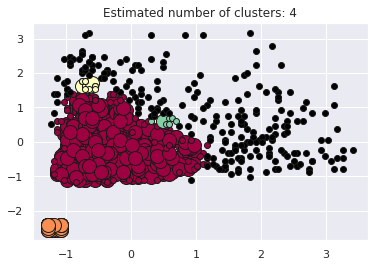

In [0]:
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
print('unique_labels',unique_labels)
print('colors',colors)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

for k, col in zip(unique_labels, colors):
    print('k: ',k)
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k) # class separate based on k ,# core sample mask: all class
    
    #Plot 
    xy = X_scaled[class_member_mask & core_samples_mask] 
    print('xy1 (vong tron to): ',xy.shape)
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    #Plot 
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    print('xy2 (vong tron nho): ',xy.shape)
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## --DBSCAN Best method (with abnormal detection)

DBSCAN is a density based clustering technique so it doesnt have any notion of centers of clusters as in KMeans. Please describe in detail as to what you want to do. You can obviously find the centroids of clusters found from the DBSCAN after getting all the samples in a cluster and then calculating their mean.

You can compute then yourself, but they may be outside of the cluster if it is not convex.

Number cluster:  4
{0, 1, 2, -1}
['#377eb8' '#ff7f00' '#4daf4a' '#000000']


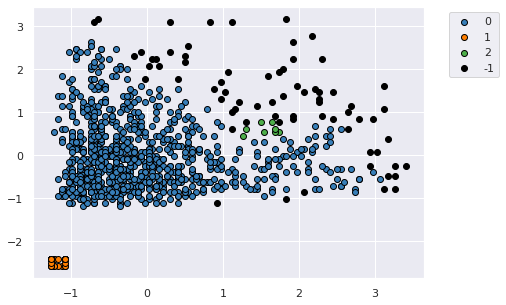

In [0]:
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X_scaled)

y_pred = db.labels_.astype(np.int)
clusters_number=len(set(y_pred))
print('Number cluster: ',clusters_number)

unique_labels = set(y_pred)
print(unique_labels)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
print(colors)

i=0
fig,ax=plt.subplots(figsize=(7,5))

for k in unique_labels:
  plt.scatter(X_scaled[y_pred==k, 0],X_scaled[y_pred==k, 1], 
              edgecolor='black',marker='o',label=k,
              c=colors[i] # Note: depend on number of cluster (max 8), if infinitive cluster, need to remove colors
              )
  i+=1
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Method 3 outlier is red

Number cluster:  4
{0, 1, 2, -1}


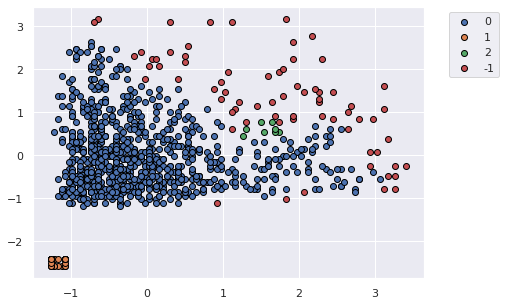

In [0]:
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X_scaled)

y_pred = db.labels_.astype(np.int)
clusters_number=len(set(y_pred))
print('Number cluster: ',clusters_number)

unique_labels = set(y_pred)
print(unique_labels)

fig,ax=plt.subplots(figsize=(7,5))

for k in unique_labels:
  plt.scatter(X_scaled[y_pred==k, 0],X_scaled[y_pred==k, 1], 
              edgecolor='black',marker='o',label=k,
              #c=colors[i]
              )
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## GaussianMixture (must define cluster)

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/german.data-numeric'
df = pd.read_csv(file_url, header=None, sep='\s\s+', prefix='X')
df.head()
X = df[['X3', 'X9']]
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



Method 1

Number cluster:  5


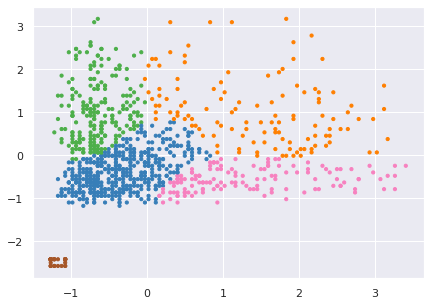

In [0]:
gmm = mixture.GaussianMixture(
    n_components=5, covariance_type='full')

gmm.fit(X_scaled)
y_pred = gmm.predict(X_scaled)
print('Number cluster: ',len(set(y_pred)))

plt.subplots(figsize=(7,5)) #fix len dataset
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=10, color=colors[y_pred])
plt.show()

### DNN GMM (outlier is black)

Number cluster:  5
{0, 1, 2, 3, 4}
['#377eb8' '#ff7f00' '#4daf4a' '#f781bf' '#a65628' '#000000']


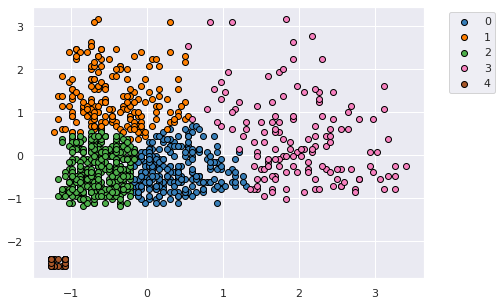

In [0]:
gmm = mixture.GaussianMixture(
    n_components=5, covariance_type='full')
gmm.fit(X_scaled)

y_pred = gmm.predict(X_scaled)

clusters_number=len(set(y_pred))
print('Number cluster: ',clusters_number)

unique_labels = set(y_pred)
print(unique_labels)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
print(colors)
i=0

fig,ax=plt.subplots(figsize=(7,5))

for k in unique_labels:
  plt.scatter(X_scaled[y_pred==k, 0],X_scaled[y_pred==k, 1], 
              edgecolor='black',marker='o',label=k,
              c=colors[i] # Note: depend on number of cluster (max 8), if infinitive cluster, need to remove colors
              )
  i+=1
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### --GMM Hands on Best method (first)

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/german.data-numeric'
df = pd.read_csv(file_url, header=None, sep='\s\s+', prefix='X')
df.head()
X = df[['X3', 'X9']]
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [0]:
print(X_scaled.shape)

(1000, 2)


#### Model selection

We cannot use the inertia or the silhouette score because they both assume that the clusters are spherical. Instead, we can try to find the model that minimizes a theoretical information criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

- $m$ is the number of instances.

- $p$ is the number of parameters learned by the model.

- $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.

Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

In [0]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [0]:
bics = [model.bic(X_scaled) for model in gms_per_k]
aics = [model.aic(X_scaled) for model in gms_per_k]

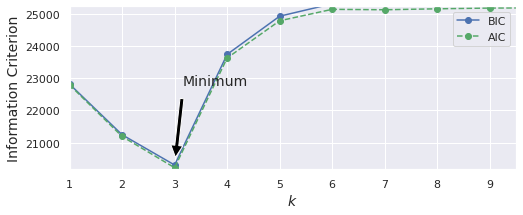

In [0]:

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
#save_fig("aic_bic_vs_k_plot")
plt.show()

In [0]:
n_components=3

#### Compare all method GMM

In [0]:
gm = GaussianMixture(n_components=n_components, n_init=10, random_state=42)
gm.fit(X_scaled)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

You can impose constraints on the covariance matrices that the algorithm looks for by setting the covariance_type hyperparameter:

"full" (default): no constraint, all clusters can take on any ellipsoidal shape of any size.

"tied": all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).

"spherical": all clusters must be spherical, but they can have different diameters (i.e., different variances).

"diag": clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).

In [0]:
print(gm.weights_)
print(gm.means_)
print(gm.covariances_)
# Did the algorithm actually converge?
print(gm.converged_)
# Yes, good. How many iterations did it take?
print(gm.n_iter_)

[0.28506876 0.27915132 0.43577992]
[[-0.71771338  0.48731911]
 [ 1.20411841 -0.06801177]
 [-0.30183488 -0.27521664]]
[[[0.04671914 0.02530699]
  [0.02530699 0.97866948]]

 [[0.96952937 0.19981114]
  [0.19981114 0.52210448]]

 [[0.28627227 0.3765571 ]
  [0.3765571  1.08602893]]]
True
23


Now that you have an estimate of the location, size, shape, orientation, and relative
weight of each cluster, the model can easily assign each instance to the most likely
cluster (hard clustering) or estimate the probability that it belongs to a particular
cluster (soft clustering). Just use the predict() method for hard clustering, or the
predict_proba() method for soft clustering:

In [0]:
gm.predict(X_scaled)[:20]
gm.predict_proba(X_scaled)[:5]

array([[9.99688645e-01, 3.10351930e-05, 2.80319588e-04],
       [3.44266331e-25, 9.99994681e-01, 5.31868273e-06],
       [5.34005778e-01, 2.62831921e-02, 4.39711030e-01],
       [7.56085365e-47, 9.99999924e-01, 7.62797324e-08],
       [1.49644573e-13, 3.83959940e-01, 6.16040060e-01]])

It is also possible to estimate the density of the model at any given location. This is
achieved using the score_samples() method: for each instance it is given, this method estimates the log of the probability density function (PDF) at that location.
The greater the score, the higher the density:

In [0]:
gm.score_samples(X_scaled)[:10]

array([-3.7875453 , -3.71885723, -2.7337345 , -3.98085174, -4.34953915,
       -4.50764865, -3.3759635 , -3.04048859, -4.72932897, -2.89784302])

In [0]:
# Function to plot cluster
def plot_centroids_2(centroids, weights=None, circle_color='black', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_cluster(model,X):
  y_pred = model.predict(X)

  clusters_number=len(set(y_pred))
  print('Number cluster: ',clusters_number)

  unique_labels = set(y_pred)
  print(unique_labels)

  colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                            '#f781bf', '#a65628', '#984ea3',
                                            '#999999', '#e41a1c', '#dede00']),
                                    int(max(y_pred) + 1))))
  # add black color for outliers (if any)
  colors = np.append(colors, ["#000000"])
  #print(colors)
  i=0

  fig,ax=plt.subplots(figsize=(7,5))

  for k in unique_labels:
    plt.scatter(X[y_pred==k, 0],X[y_pred==k, 1], 
                edgecolor='black',marker='o',label=k,
                c=colors[i] # Note: depend on number of cluster (max 8), if infinitive cluster, need to remove colors
                )
    i+=1
  plot_centroids_2(model.means_,model.weights_)
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.show()

In [0]:
# Function to plot gaussian_mixtures_plot
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)
    
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [0]:
gm_full = GaussianMixture(n_components=n_components, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=n_components, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=n_components, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=n_components, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X_scaled)
gm_tied.fit(X_scaled)
gm_spherical.fit(X_scaled)
gm_diag.fit(X_scaled)
gm_dict={'gm_full':gm_full,'gm_tied':gm_tied,'gm_spherical':gm_spherical,'gm_diag':gm_diag}

gm model name:  gm_full


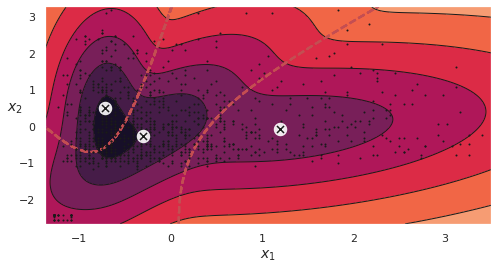

gm model name:  gm_tied


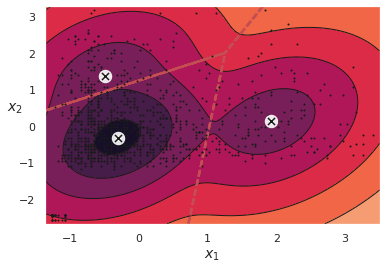

gm model name:  gm_spherical


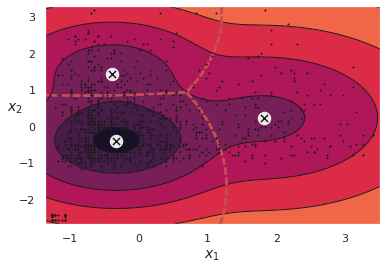

gm model name:  gm_diag


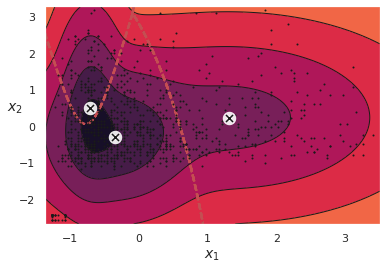

In [0]:
plt.figure(figsize=(8, 4))

for (name,model) in gm_dict.items():
  print('gm model name: ',name)
  plot_gaussian_mixture(model, X_scaled)
  #save_fig("gaussian_mixtures_plot")
  plt.show()



gm_full
Number cluster:  3
{0, 1, 2}


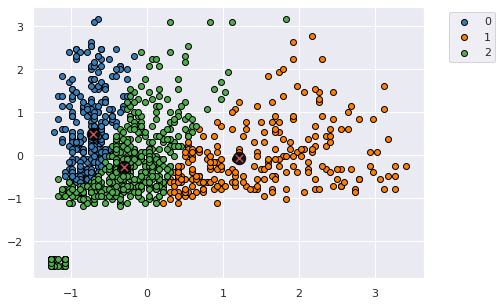

gm_tied
Number cluster:  3
{0, 1, 2}


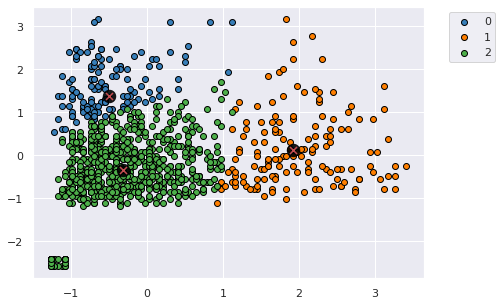

gm_spherical
Number cluster:  3
{0, 1, 2}


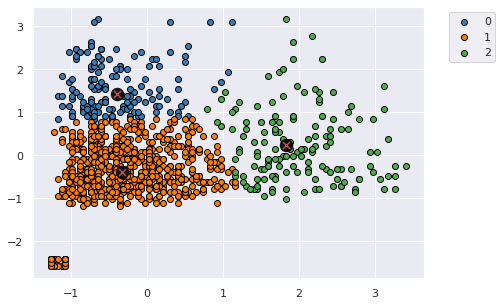

gm_diag
Number cluster:  3
{0, 1, 2}


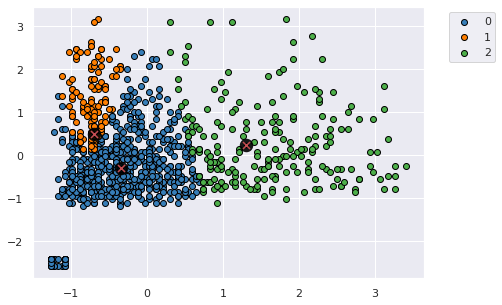

In [0]:
for (name,model) in gm_dict.items():
  print(name)
  plot_cluster(model,X_scaled)

In [0]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

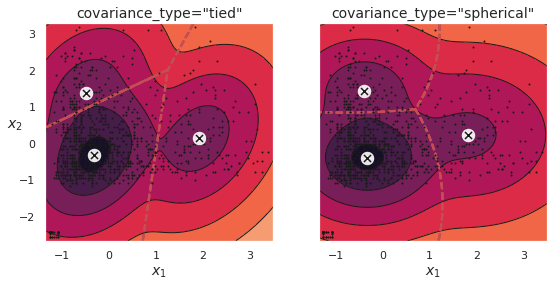

In [0]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X_scaled)

#save_fig("covariance_type_plot")
plt.show()

#### Anomaly Detection using Gaussian Mixtures


Gaussian Mixtures can be used for anomaly detection: instances located in low-density regions can be considered anomalies. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. Say it is equal to 4%, then you can set the density threshold to be the value that results in having 4% of the instances located in areas below that threshold density:

In [0]:
densities = gm_full.score_samples(X_scaled)
density_threshold = np.percentile(densities, 4)
anomalies = X_scaled[densities < density_threshold]
print(densities.shape)
print(anomalies.shape)

(1000,)
(40, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning:

Log scale: values of z <= 0 have been masked

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning:

Log scale: values of z <= 0 have been masked



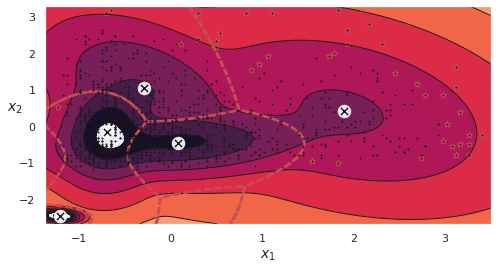

In [0]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm_full, X_scaled)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
#plt.ylim(top=5.1)
#save_fig("mixture_anomaly_detection_plot")
plt.show()

### DNN Bayesian Gaussian Mixture (for outlier detect)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



Number cluster:  5
{0, 1, 2, 3, 4}
['#377eb8' '#ff7f00' '#4daf4a' '#f781bf' '#a65628' '#000000']


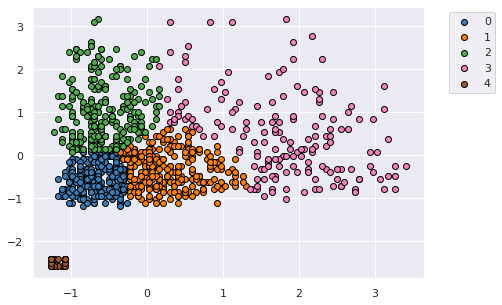

In [0]:
dpgmm = mixture.BayesianGaussianMixture(n_components=5,
                                        covariance_type='full').fit(X)
dpgmm.fit(X_scaled)

y_pred = dpgmm.predict(X_scaled)

clusters_number=len(set(y_pred))
print('Number cluster: ',clusters_number)

unique_labels = set(y_pred)
print(unique_labels)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
print(colors)
i=0

fig,ax=plt.subplots(figsize=(7,5))

for k in unique_labels:
  plt.scatter(X_scaled[y_pred==k, 0],X_scaled[y_pred==k, 1], 
              edgecolor='black',marker='o',label=k,
              c=colors[i] # Note: depend on number of cluster (max 8), if infinitive cluster, need to remove colors
              )
  i+=1
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Bayesian Gaussian Mixture Handson (No define cluster)

Rather than manually searching for the optimal number of clusters, it is possible to use instead the BayesianGaussianMixture class which is capable of giving weights equal (or close) to zero to unnecessary clusters. Just set the number of components to a value that you believe is greater than the optimal number of clusters, and the algorithm will eliminate the unnecessary clusters automatically.

In [0]:
bgm = BayesianGaussianMixture(n_components=3, n_init=10, random_state=42)
bgm.fit(X_scaled)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=3, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

Number cluster:  3
{0, 1, 2}


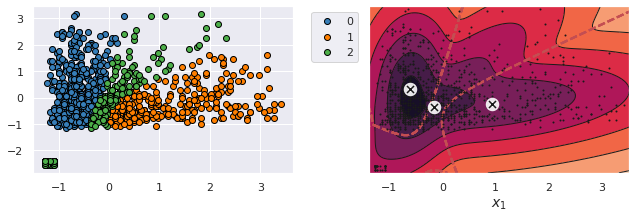

In [0]:

plt.figure(figsize=(9, 3.2))

plt.subplot(121)

y_pred = bgm.predict(X_scaled)

clusters_number=len(set(y_pred))
print('Number cluster: ',clusters_number)

unique_labels = set(y_pred)
print(unique_labels)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
#print(colors)
i=0

#fig,ax=plt.subplots(figsize=(7,5))

for k in unique_labels:
  plt.scatter(X_scaled[y_pred==k, 0],X_scaled[y_pred==k, 1], 
              edgecolor='black',marker='o',label=k,
              c=colors[i] # Note: depend on number of cluster (max 8), if infinitive cluster, need to remove colors
              )
  i+=1
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

#----------------------------
plt.subplot(122)
plot_gaussian_mixture(bgm, X_scaled, show_ylabels=False)

#save_fig("moons_vs_bgm_plot")
plt.tight_layout()
plt.show()

## OPTICS (just reference)

Number cluster:  3
{0, 1, -1}
['#377eb8' '#ff7f00' '#000000']


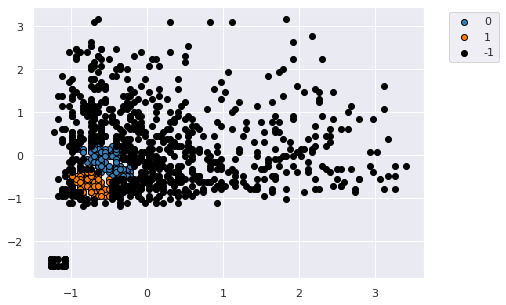

In [0]:
optics = cluster.OPTICS(min_samples=20,
                        xi=0.05,
                        min_cluster_size=0.1)
optics.fit(X_scaled)

y_pred = optics.labels_.astype(np.int)
clusters_number=len(set(y_pred))
print('Number cluster: ',clusters_number)

unique_labels = set(y_pred)
print(unique_labels)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
print(colors)

i=0
fig,ax=plt.subplots(figsize=(7,5))

for k in unique_labels:
  plt.scatter(X_scaled[y_pred==k, 0],X_scaled[y_pred==k, 1], 
              edgecolor='black',marker='o',label=k,
              c=colors[i] # Note: depend on number of cluster (max 8), if infinitive cluster, need to remove colors
              )
  i+=1
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Compare all cluster method

### Method 1

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/german.data-numeric'
df = pd.read_csv(file_url, header=None, sep='\s\s+', prefix='X')
df.head()

X = df[['X3', 'X9']]
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



MiniBatchKMeans (D)
Number cluster:  5
{0, 1, 2, 3, 4}


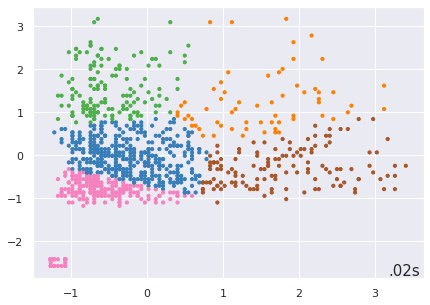

AffinityPropagation
Number cluster:  3
{0, 1, 2}


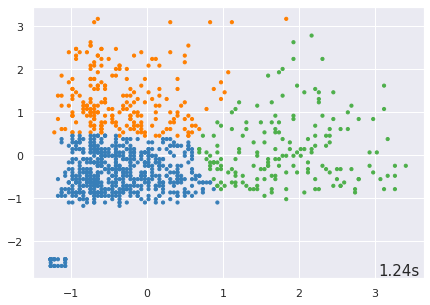

MeanShift
Number cluster:  2
{0, 1}


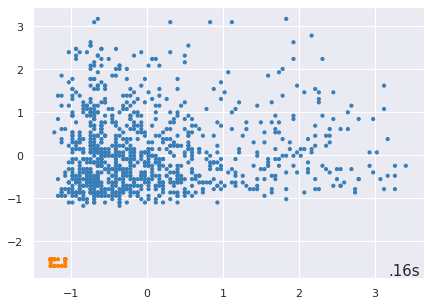

SpectralClustering (D)
Number cluster:  5
{0, 1, 2, 3, 4}


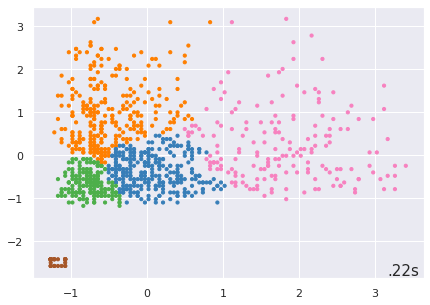

Agglomerative-ward (D)
Number cluster:  5
{0, 1, 2, 3, 4}


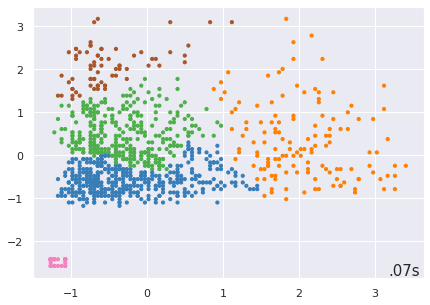

Agglomerative-average_linkage (D)
Number cluster:  5
{0, 1, 2, 3, 4}


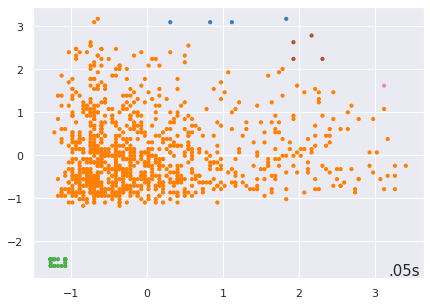

DBSCAN
Number cluster:  5
{0, 1, 2, 3, -1}


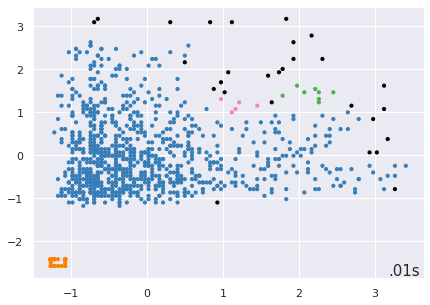

OPTICS
Number cluster:  3
{0, 1, -1}


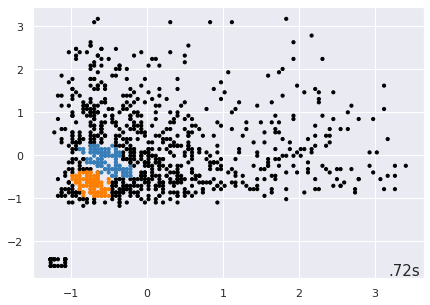

Birch (D)
Number cluster:  5
{0, 1, 2, 3, 4}


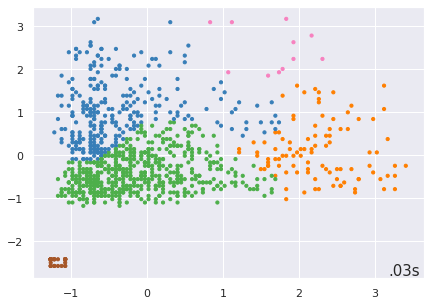

GaussianMixture (D)
Number cluster:  5
{0, 1, 2, 3, 4}


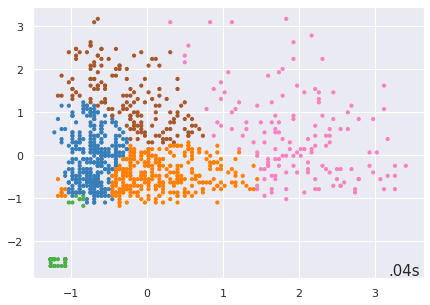

In [0]:
import time
import warnings

time_=[]
name_=[]
num_cluster=[]
# Default setting for clustering algorithm:
default_base = {'quantile': .3,     # Meanshift bandwith
                'eps': .3,          # Dbscan
                'damping': .9,      # Affinity_propagation 
                'preference': -200, # Affinity_propagation 
                'n_neighbors': 10,  # Agglomerative, average_linkage 
                'n_clusters': 5, # Two_means, Agglomerative, Spectral, Average_linkage, Birch, GaussianMixture
                'min_samples': 20,  # Optics
                'xi': 0.05,         # Optics 
                'min_cluster_size': 0.1 # Optics
                }

# update parameters with dataset-specific values
params = default_base.copy()

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X_scaled, quantile=params['quantile']) # Mean shift

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X_scaled, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])

ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)

average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)

spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")

dbscan = cluster.DBSCAN(eps=params['eps'])

optics = cluster.OPTICS(min_samples=params['min_samples'],
                        xi=params['xi'],
                        min_cluster_size=params['min_cluster_size'])

affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])

birch = cluster.Birch(n_clusters=params['n_clusters'])

gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')

clustering_algorithms = (
    ('MiniBatchKMeans (D)', two_means), #must define n_cluster
    ('AffinityPropagation', affinity_propagation), #no define cluster
    ('MeanShift', ms), #no define cluster
    ('SpectralClustering (D)', spectral), #must define n_cluster
    ('Agglomerative-ward (D)', ward), #must define n_cluster
    ('Agglomerative-average_linkage (D)', average_linkage), #must define n_cluster
    ('DBSCAN', dbscan), # Detect outlier #no define cluster
    ('OPTICS', optics), # Detect outlier #no define cluster
    ('Birch (D)', birch), #must define n_cluster
    ('GaussianMixture (D)', gmm) # Detect outlier #must define n_cluster
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()
    print(name)
    name_.append(name)
    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X_scaled)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X_scaled)

    print('Number cluster: ',len(set(y_pred)))
    print(set(y_pred))
    num_cluster.append(len(set(y_pred)))

    plt.subplots(figsize=(7,5)) #fix len dataset

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=10, color=colors[y_pred])

    #plt.xlim(-2.5, 2.5)
    #plt.ylim(-2.5, 2.5)
    #plt.xticks(())
    #plt.yticks(())
    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
              transform=plt.gca().transAxes, size=15,
              horizontalalignment='right')
    #plot_num += 1
    #plt.legend(color)
    time_.append(t1-t0)
    plt.show()



In [0]:
pd.DataFrame(zip(name_,num_cluster,time_),columns=['Algorithm cluster','Num_cluster','Time']).sort_values(by='Time',ascending='False')

,Algorithm cluster,Num_cluster,Time
6,DBSCAN,5,0.012036
0,MiniBatchKMeans (D),5,0.019322
8,Birch (D),5,0.029395
9,GaussianMixture (D),5,0.040456
5,Agglomerative-average_linkage (D),5,0.052883
4,Agglomerative-ward (D),5,0.065490
2,MeanShift,2,0.158108
3,SpectralClustering (D),5,0.215847
7,OPTICS,3,0.716339
1,AffinityPropagation,3,1.238724


### Method 2

MiniBatchKMeans (D)
Number cluster:  5
{0, 1, 2, 3, 4}


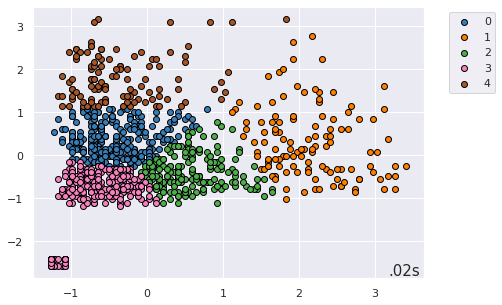

AffinityPropagation
Number cluster:  3
{0, 1, 2}


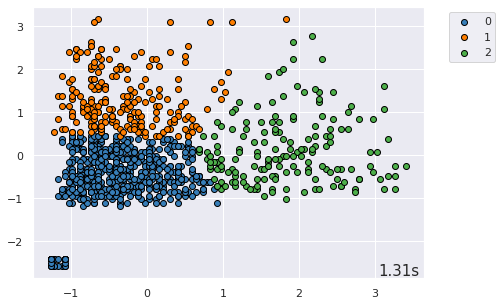

MeanShift
Number cluster:  2
{0, 1}


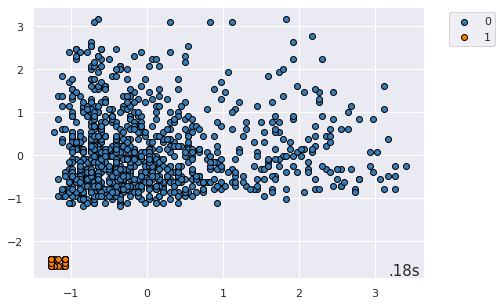

SpectralClustering (D)
Number cluster:  5
{0, 1, 2, 3, 4}


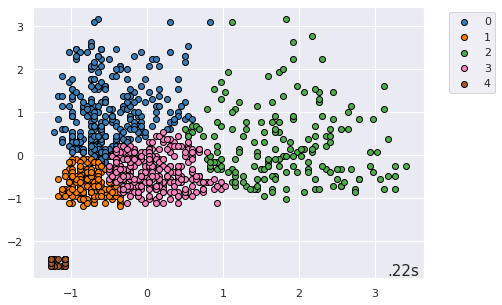

Agglomerative-ward (D)
Number cluster:  5
{0, 1, 2, 3, 4}


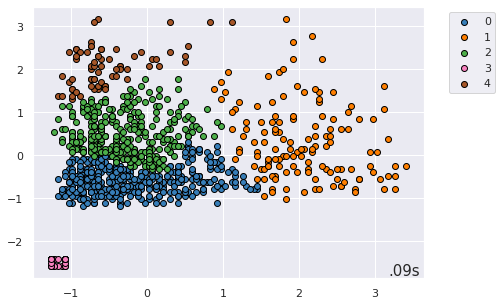

Agglomerative-average_linkage (D)
Number cluster:  5
{0, 1, 2, 3, 4}


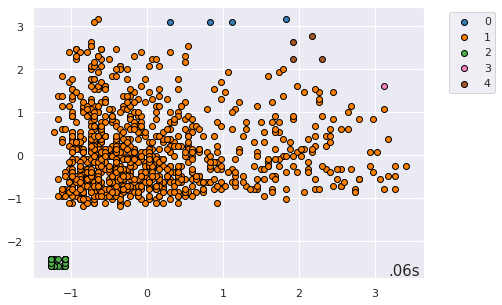

DBSCAN
Number cluster:  5
{0, 1, 2, 3, -1}


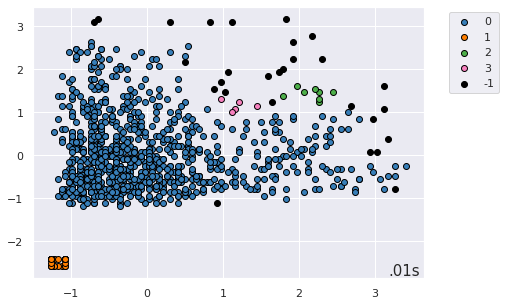

OPTICS
Number cluster:  3
{0, 1, -1}


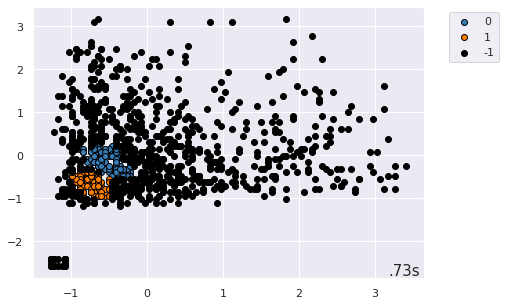

Birch (D)
Number cluster:  5
{0, 1, 2, 3, 4}


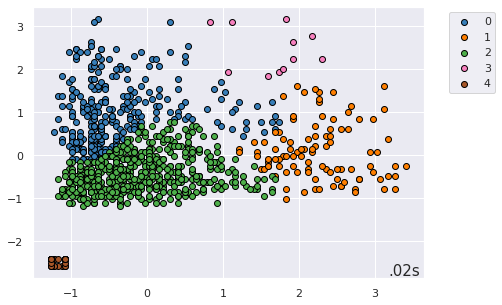

GaussianMixture (D)
Number cluster:  5
{0, 1, 2, 3, 4}


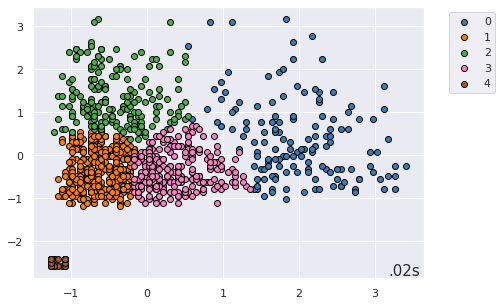

In [0]:
import time
import warnings

time_=[]
name_=[]
num_cluster=[]
# Default setting for clustering algorithm:
default_base = {'quantile': .3,     # Meanshift bandwith
                'eps': .3,          # Dbscan
                'damping': .9,      # Affinity_propagation 
                'preference': -200, # Affinity_propagation 
                'n_neighbors': 10,  # Agglomerative, average_linkage 
                'n_clusters': 5, # Two_means, Agglomerative, Spectral, Average_linkage, Birch, GaussianMixture
                'min_samples': 20,  # Optics
                'xi': 0.05,         # Optics 
                'min_cluster_size': 0.1 # Optics
                }

# update parameters with dataset-specific values
params = default_base.copy()

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X_scaled, quantile=params['quantile']) # Mean shift

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X_scaled, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])

ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)

average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)

spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")

dbscan = cluster.DBSCAN(eps=params['eps'])

optics = cluster.OPTICS(min_samples=params['min_samples'],
                        xi=params['xi'],
                        min_cluster_size=params['min_cluster_size'])

affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])

birch = cluster.Birch(n_clusters=params['n_clusters'])

gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')

clustering_algorithms = (
    ('MiniBatchKMeans (D)', two_means),
    ('AffinityPropagation', affinity_propagation),
    ('MeanShift', ms),
    ('SpectralClustering (D)', spectral),
    ('Agglomerative-ward (D)', ward),
    ('Agglomerative-average_linkage (D)', average_linkage),
    ('DBSCAN', dbscan),
    ('OPTICS', optics),
    ('Birch (D)', birch),
    ('GaussianMixture (D)', gmm)
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()
    print(name)
    name_.append(name)
    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X_scaled)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X_scaled)

    
    #---------------DNN add-----------------------

    clusters_number=len(set(y_pred))
    print('Number cluster: ',clusters_number)
    print(set(y_pred))
    num_cluster.append(clusters_number)

    unique_labels = set(y_pred)
  
    #print(unique_labels)
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])
    i=0
    fig,ax=plt.subplots(figsize=(7,5))

    for k in unique_labels:
      plt.scatter(X_scaled[y_pred==k, 0],X_scaled[y_pred==k, 1], 
                  edgecolor='black',marker='o',label=k,
                  c=colors[i] # Note: depend on number of cluster, if infinitive cluster, need to remove colors
                  )
      i+=1
      
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
              transform=plt.gca().transAxes, size=15,
              horizontalalignment='right')
    #plot_num += 1
    #plt.legend(color)
    time_.append(t1-t0)
    plt.show()



In [0]:
pd.DataFrame(zip(name_,num_cluster,time_),columns=['Algorithm cluster','Num_cluster','Time']).sort_values(by='Time',ascending='False')

# -- PCA and clustering Best method (K Mean)

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/german.data-numeric'
df = pd.read_csv(file_url, header=None, sep='\s\s+', prefix='X')
df.head()
#X = df[['X3', 'X9']]
#standard_scaler = StandardScaler()
#X_scaled = standard_scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1,1.0
1,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1,2.0
2,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0,1,0,1,0,1.0
3,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0,0,1,1.0
4,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,0,0,1,2.0


In [0]:
#df.dtypes

In [0]:
X=df.select_dtypes(include=['float64','int64'])
#X.isnull().sum()

In [0]:
X.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)
X_scaled

array([[-1.25435442, -1.25199741, -0.80888337, ..., -0.50845864,
         0.74959272, -0.63407159],
       [-0.46191312,  2.48506734,  1.51189196, ..., -0.50845864,
         0.74959272,  1.57710898],
       [ 1.12296947, -0.71813102, -0.373738  , ...,  1.96672833,
        -1.33405777, -0.63407159],
       ...,
       [ 1.12296947, -0.71813102, -1.00228132, ..., -0.50845864,
         0.74959272, -0.63407159],
       [-1.25435442,  2.21813414, -0.51878646, ..., -0.50845864,
         0.74959272,  1.57710898],
       [-0.46191312,  2.21813414,  0.83499915, ..., -0.50845864,
         0.74959272, -0.63407159]])

Choosing the Right Number of Dimensions

In [0]:
#Method 1
pca = PCA()
pca.fit(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

20

In [0]:
# Method 2
pca = PCA(n_components=0.99)
X_reduced = pca.fit_transform(X_scaled)
pca.n_components_

23

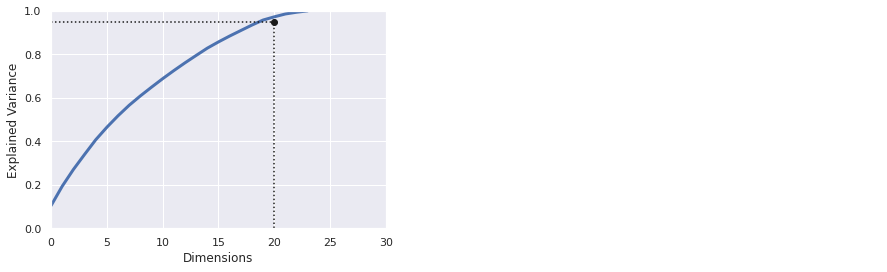

In [0]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 30, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
#pca = PCA(0.99) # Create a PCA that will retain 99% of the variance
X_train_pca = pca.fit_transform(X_scaled)
print(X.shape)
print(X_train_pca.shape)

(1000, 24)
(959, 20)


Choosing the right number of Cluster

In [0]:
from sklearn.cluster import KMeans

#k_range = range(5, 150, 5)
k_range = range(2,15)
kmeans_per_k = []
for k in k_range:
    #print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

In [0]:
kmeans_per_k[5].labels_[:30]

array([0, 4, 2, 4, 4, 1, 0, 1, 2, 4, 3, 3, 0, 2, 3, 2, 0, 4, 0, 0, 3, 3,
       1, 0, 2, 2, 3, 0, 4, 0], dtype=int32)

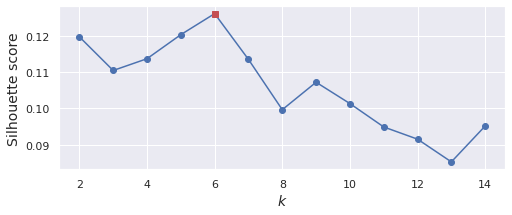

In [0]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [0]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
best_k

6

Inetria below just for reference only (illustrate best model and best index from silhoute above)

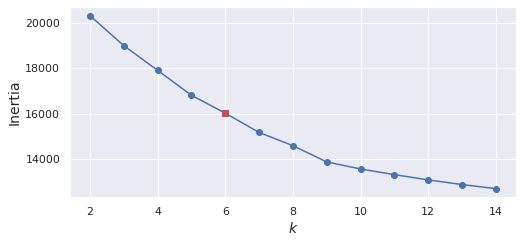

In [0]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

The optimal number of clusters is not clear on this inertia diagram, as there is no obvious elbow, so let's stick with k=120.

In [0]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
def plot_centroids(centroids, weights=None, circle_color='black', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

{0, 1, 2, 3, 4, 5}
[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.9568627450980393, 0.42745098039215684, 0.2627450980392157, 1.0), (0.996078431372549, 0.8784313725490196, 0.5450980392156862, 1.0), (0.9019607843137256, 0.9607843137254902, 0.5960784313725491, 1.0), (0.4, 0.7607843137254902, 0.6470588235294118, 1.0), (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]


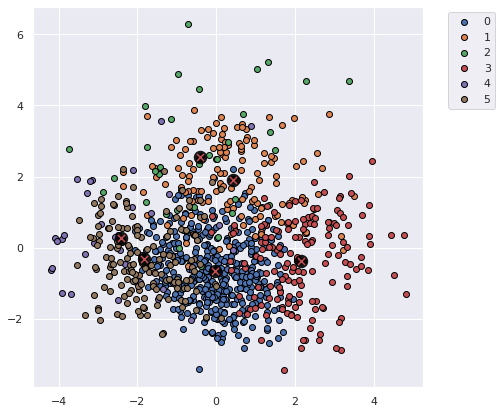

In [0]:
#ac.fit(X_scaled)
clusters_number=best_k
cluster=best_model.predict(X_train_pca)

unique_labels = set(cluster)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
print(unique_labels)
print(colors)

fig,ax=plt.subplots(figsize=(7,7))
for k in range(clusters_number):
  plt.scatter(X_train_pca[cluster==k, 0],X_train_pca[cluster==k, 1], 
              edgecolor='black',marker='o',label=k)
plot_centroids(best_model.cluster_centers_) # Plot center
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [0]:
df['cluster_kmean'] = best_model.predict(X_train_pca)
data['cluster_kmean'] .value_counts()

# Dimension reduction

As a
result, high-dimensional datasets are at risk of being very sparse: most training
instances are likely to be far away from each other. This also means that a new
instance will likely be far away from any training instance, making predictions much
less reliable than in lower dimensions, since they will be based on much larger extrap‐
olations. In short, the more dimensions the training set has, the greater the risk of
overfitting it

In theory, one solution to the curse of dimensionality could be to increase the size of
the training set to reach a sufficient density of training instances. Unfortunately, in
practice, the number of training instances required to reach a given density grows
exponentially with the number of dimensions. With just 100 features (significantly
fewer than in the MNIST problem), you would need more training instances than
atoms in the observable universe in order for training instances to be within 0.1 of
each other on average, assuming they were spread out uniformly across all dimen‐
sions.

## PCA

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/german.data-numeric'
df = pd.read_csv(file_url, header=None, sep='\s\s+', prefix='X')
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1,1.0
1,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1,2.0
2,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0,1,0,1,0,1.0
3,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0,0,1,1.0
4,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,0,0,1,2.0


In [0]:
X=df.select_dtypes(include=['float64','int64'])
X.dropna(inplace=True)
X.shape
#X.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(959, 24)

In [0]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)
X_scaled

array([[-1.25435442, -1.25199741, -0.80888337, ..., -0.50845864,
         0.74959272, -0.63407159],
       [-0.46191312,  2.48506734,  1.51189196, ..., -0.50845864,
         0.74959272,  1.57710898],
       [ 1.12296947, -0.71813102, -0.373738  , ...,  1.96672833,
        -1.33405777, -0.63407159],
       ...,
       [ 1.12296947, -0.71813102, -1.00228132, ..., -0.50845864,
         0.74959272, -0.63407159],
       [-1.25435442,  2.21813414, -0.51878646, ..., -0.50845864,
         0.74959272,  1.57710898],
       [-0.46191312,  2.21813414,  0.83499915, ..., -0.50845864,
         0.74959272, -0.63407159]])

Choosing the Right Number of Dimensions

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is
simpler to choose the number of dimensions that add up to a sufficiently large por‐
tion of the variance (e.g., 95%). Unless, of course, you are reducing dimensionality for
data visualization—in that case you will want to reduce the dimensionality down to 2
or 3.

In [0]:
# Method 1
pca = PCA()
pca.fit(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

20

In [0]:
# Method 2
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_scaled)
pca.n_components_

20

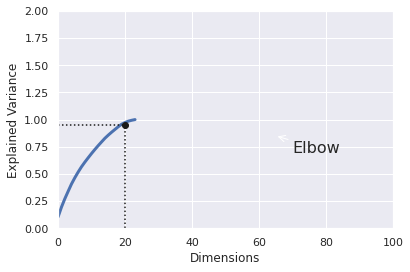

In [0]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 100, 0, 2])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

### Randomized PCA

If you set the svd_solver hyperparameter to "randomized", Scikit-Learn uses a sto‐
chastic algorithm called Randomized PCA that quickly finds an approximation of the
first d principal components. Its computational complexity is O(m × d2) + O(d3),
instead of O(m × n2) + O(n3) for the full SVD approach, so it is dramatically faster
than full SVD when d is much smaller than n:

By default, svd_solver is actually set to "auto": Scikit-Learn automatically uses the
randomized PCA algorithm if m or n is greater than 500 and d is less than 80% of m
or n, or else it uses the full SVD approach. If you want to force Scikit-Learn to use full
SVD, you can set the svd_solver hyperparameter to "full".

In [0]:
rnd_pca = PCA(n_components=5, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_scaled)

### Incremental PCA

One problem with the preceding implementations of PCA is that they require the
whole training set to fit in memory in order for the algorithm to run. Fortunately,
Incremental PCA (IPCA) algorithms have been developed. They allow you to split the
training set into mini-batches and feed an IPCA algorithm one mini-batch at a time.

In [0]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=5)
for X_batch in np.array_split(X_scaled, n_batches):
  inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_scaled)
X_reduced[:5]

array([[-0.30950091, -2.70067731,  1.23113515, -0.87317147,  0.34510183],
       [ 1.13651285,  1.1491189 , -2.44010123,  1.61401954, -0.50849417],
       [-2.14196691, -1.43647662,  1.95740326,  0.33509405, -1.310247  ],
       [ 2.11933674,  0.94784558,  1.0054958 ,  0.0390643 , -0.55559209],
       [ 1.48567548,  0.87248491,  1.96280202,  1.94577672,  2.57209375]])

In [0]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)
X_recovered_inc_pca[:2]

array([[ 1.04115343, -0.65314529, -0.41529233,  0.92326223,  1.14213096,
         0.55821592,  0.60761298, -0.2482902 ,  1.1571889 ,  0.07813561,
         0.5883051 ,  0.60337163,  0.36768214,  0.40087021,  0.08351126,
         0.25564034,  0.43282852, -0.50238384, -0.65392264,  0.52251363,
        -0.25000017,  0.13208343,  0.02783907, -1.24884952],
       [-0.65766472,  1.20792187,  0.81840851, -0.79799942, -0.9040624 ,
        -0.49406713, -1.02306975,  0.48439071, -1.06304231, -0.27659998,
        -0.42646294, -0.79210165, -0.00451019, -0.92192755, -0.43472243,
        -0.19075261, -0.0697544 ,  0.18869895, -0.5168833 ,  0.53932859,
        -0.08250975, -0.75881275,  0.54111879,  1.15056087]])

### Using memmap()

Alternatively, you can use NumPy’s memmap class, which allows you to manipulate a
large array stored in a binary file on disk as if it were entirely in memory; the class
loads only the data it needs in memory, when it needs it. Since the IncrementalPCA
class uses only a small part of the array at any given time, the memory usage remains
under control. This makes it possible to call the usual fit() method, as you can see
in the following code:

### Time complexity

Let's time regular PCA against Incremental PCA and Randomized PCA, for various number of principal components:

In [0]:
import time

for n_components in (2, 10, 20):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components)
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_scaled)
        t2 = time.time()
        print("    {}: {:.3f} seconds".format(pca.__class__.__name__, t2 - t1))

n_components = 2
    PCA: 0.005 seconds
    IncrementalPCA: 0.010 seconds
    PCA: 0.017 seconds
n_components = 10
    PCA: 0.005 seconds
    IncrementalPCA: 0.005 seconds
    PCA: 0.005 seconds
n_components = 20
    PCA: 0.003 seconds
    IncrementalPCA: 0.004 seconds
    PCA: 0.007 seconds


Now let's compare PCA and Randomized PCA for datasets of different sizes (number of instances):

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

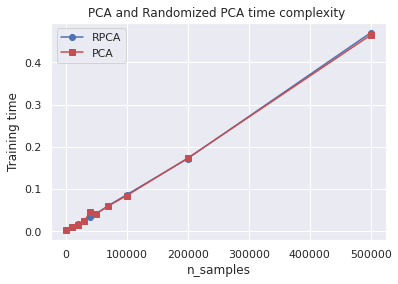

In [0]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components = 2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

And now let's compare their performance on datasets of 2,000 instances with various numbers of features:

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

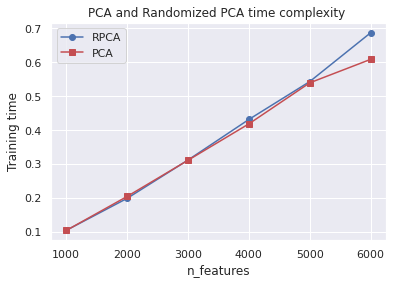

In [0]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

### Kernel PCA

In Chapter 5 we discussed the kernel trick, a mathematical technique that implicitly
maps instances into a very high-dimensional space (called the feature space), enabling
nonlinear classification and regression with Support Vector Machines. Recall that a
linear decision boundary in the high-dimensional feature space corresponds to a
complex nonlinear decision boundary in the original space.

In [0]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
print(X.shape)
print(t.shape)

(1000, 3)
(1000,)


In [0]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X_scaled)

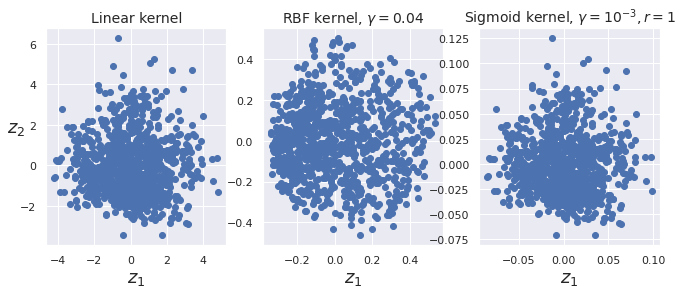

In [0]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

#y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X_scaled)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], #c=t, 
                cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

#save_fig("kernel_pca_plot")
plt.show()

### Tunning Kernel PCA

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
#grid_search.fit(X, y)
#print(grid_search.best_params_)

#rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
#                    fit_inverse_transform=True)
#X_reduced = rbf_pca.fit_transform(X)
#X_preimage = rbf_pca.inverse_transform(X_reduced)

#from sklearn.metrics import mean_squared_error

#mean_squared_error(X, X_preimage)

## ICA

In [0]:

# Defining the ICA with number of components
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=5, random_state=123) 

t0 = time.time()
X_ica=ICA.fit_transform(X_scaled)
t1 = time.time()
print("ICA fitting time:", round(t1-t0, 3), "s")

ICA fitting time: 0.024 s


## LLE

Locally Linear Embedding (LLE)8 is another powerful nonlinear dimensionality reduc‐
tion (NLDR) technique. It is a Manifold Learning technique that does not rely on
projections, like the previous algorithms do. In a nutshell, LLE works by first measur‐
ing how each training instance linearly relates to its closest neighbors (c.n.), and then
looking for a low-dimensional representation of the training set where these local
relationships are best preserved (more details shortly). This approach makes it partic‐
ularly good at unrolling twisted manifolds, especially when there is not too much
noise.

In [0]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X_scaled)

## MDS, Isomap and t-SNE

Multidimensional Scaling (MDS):

Reduces dimensionality while trying to preserve the distances between the
instances.

In [0]:
from sklearn.manifold import MDS

t0 = time.time()

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X_scaled)

t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
print(X_reduced_mds.shape)

PCA took 29.1s.
(959, 2)


Isomap:

Creates a graph by connecting each instance to its nearest neighbors, then
reduces dimensionality while trying to preserve the geodesic distances9 between
the instances.

In [0]:
from sklearn.manifold import Isomap

t0 = time.time()
isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X_scaled)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
X_reduced_isomap.shape

PCA took 0.5s.


(959, 2)

t-Distributed Stochastic Neighbor Embedding (t-SNE): 

Reduces dimensionality while trying to keep similar instances close and dissimi‐
lar instances apart. It is mostly used for visualization, in particular to visualize
clusters of instances in high-dimensional space (e.g., to visualize the MNIST
images in 2D).

In [0]:
from sklearn.manifold import TSNE

t0 = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X_scaled)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
X_reduced_tsne.shape

PCA took 6.8s.


(959, 2)

In [0]:
titles = ["MDS", "Isomap", "t-SNE"]

## Independent Component Analysis

In [0]:
# Defining the ICA with number of components
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=5, random_state=123) 

In [0]:
t0 = time.time()
X_reduced_ICA=ICA.fit_transform(X_scaled)

t1 = time.time()
print("ICA took {:.1f}s.".format(t1 - t0))
X_reduced_ICA.shape

PCA took 0.0s.


(959, 5)

## Factor Analysis

In [0]:
# Defining the number of factors
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components = 5,random_state=123)

In [0]:
t0 = time.time()
X_reduced_FA=fa.fit_transform(X_scaled)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
X_reduced_FA.shape

PCA took 0.1s.


(959, 5)